In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, pearsonr
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
seed = 62

In [3]:
data = pd.read_csv("./clean_data/clean_data_v2.csv", index_col = 'Unnamed: 0')

In [4]:
data = data[data['Price(USD)'].notna()]

In [5]:
data

,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Storage_Type,Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Price(USD)
0,MSI CreatorPro Z16P B12UKST,2022,Windows,core i7-12700h,14,20,2.3,4.7,10,24,...,32,0,5,1024,SSD,16.0,2560,1600,2.372,3679.0
3,Lenovo Legion Slim 7-16IAH 82TF004YGE,2022,Windows,core i7-12700h,14,20,2.3,4.7,10,24,...,16,0,5,1024,SSD,16.0,2560,1600,2.206,2313.0
4,Lenovo Legion S7 16ARHA7,2022,Windows,ryzen 9 6900hx,8,16,3.3,4.9,6,16,...,16,0,5,1024,SSD,16.0,2560,1600,2.181,1950.0
5,Huawei MateBook X Pro 2022,2022,Windows,core i7-1260p,12,16,2.1,4.7,10,18,...,16,0,4,1024,SSD,14.2,3120,2080,1.268,2311.0
6,HP EliteBook 845 G9 6F6H9EA,2022,Windows,ryzen 5 pro 6650u,6,12,2.9,4.5,6,16,...,16,0,5,512,SSD,14.0,1920,1200,1.424,1472.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,Apple MacBook Pro 16 2021 M1 Pro,2021,MacOS,apple m1 pro,10,10,3.2,NaN,5,24,...,16,0,4,1024,SSD,16.2,3456,2234,2.153,3523.0
1902,Apple MacBook Pro 14 2021 M1 Pro Entry,2021,MacOS,apple m1 pro 8-core,8,8,3.2,NaN,5,24,...,16,0,4,512,SSD,14.2,3024,1964,1.600,2660.0
1903,Apple MacBook Pro 14 2021 M1 Max 24-Core GPU,2021,MacOS,apple m1 max,10,10,3.2,NaN,5,48,...,32,0,4,512,SSD,14.2,3024,1964,1.600,3795.0
1904,Acer Swift 1 SF114-34-P6U1,2021,Linux,pentium silver n6000,4,4,1.1,3.3,10,4,...,4,0,4,128,SSD,14.0,1920,1080,1.300,413.0


In [6]:
data['Storage_Type'].unique()

array(['SSD'], dtype=object)

In [7]:
data.drop(axis = 1, labels = 'Storage_Type', inplace = True)

In [8]:
null_cpu_boosted_clock_mask = data['CPU_Boosted_Clock'].isna()

In [9]:
data.loc[null_cpu_boosted_clock_mask, 'CPU_Boosted_Clock'] = data.loc[null_cpu_boosted_clock_mask, 'CPU_Default_Clock']

In [10]:
null_gpu_memory_type_mask = data['GPU_Memory_Type'].isna()

In [11]:
data.loc[null_gpu_memory_type_mask, 'GPU_Memory_Type'] = 'nan'

In [12]:
brand = [None] * len(data['Laptop_name'])

In [13]:
for idx, name in enumerate(data['Laptop_name']):
    brand[idx] = name.split()[0]

In [14]:
brand = pd.Series(brand, data.index)

In [15]:
brand.loc[brand == 'B5302FEA-LG0081R'] = 'Asus'
brand.loc[brand == 'NX.A82EV.00H'] = 'Acer'
brand.loc[brand == 'EUL-W19D'] = 'Huawei'
brand.loc[brand == '20WM003TGE'] = 'Lenovo'
brand.loc[brand == 'G.AA79G'] = 'LG'
brand.loc[brand == 'NX.HQ7EG.004'] = 'Acer'
brand.loc[brand == 'Gigabyte'] = 'Gigabyte Aero'
brand.loc[brand == 'ThinkPad'] = 'Lenovo'
brand.loc[brand == 'Yoga'] = 'Lenovo'
brand.loc[brand == 'VivoBook'] = 'Asus'
brand.loc[brand == 'ROG'] = 'Asus'
brand.loc[brand == 'Alpha'] = 'MSI'
brand.loc[brand == 'Swift'] = 'Acer'
brand.loc[brand == 'MateBook'] = 'Huawei'

In [16]:
data['Brand'] = brand

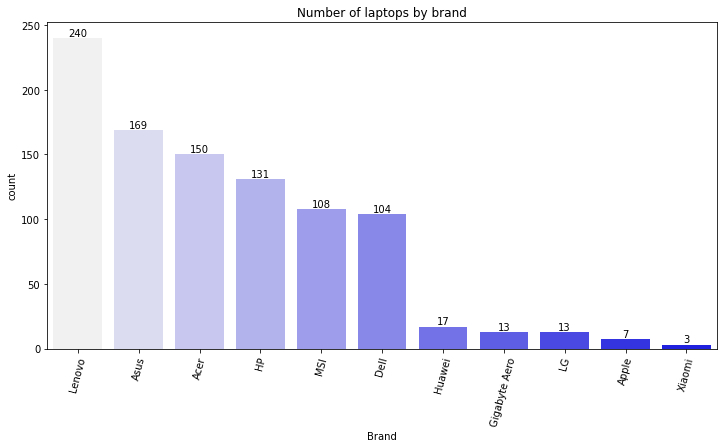

In [17]:
fig, ax  = plt.subplots(figsize=(12,6))
ax=sns.countplot(x = 'Brand', data = data,  order = data['Brand'].value_counts().index, palette = 'light:b')
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brand')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.show()

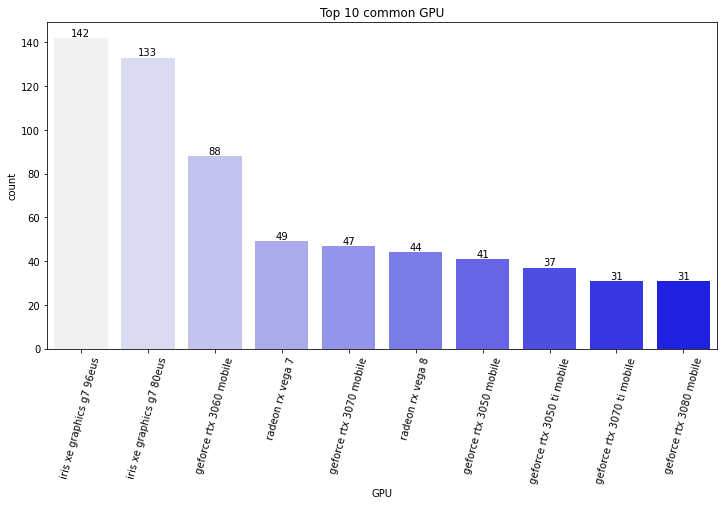

In [18]:
fig, ax  = plt.subplots(figsize=(12,6))
ax=sns.countplot(x = 'GPU', data = data,  order = data['GPU'].value_counts()[:10].index, palette = 'light:b')
ax.bar_label(ax.containers[0])
plt.title('Top 10 common GPU')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.show()

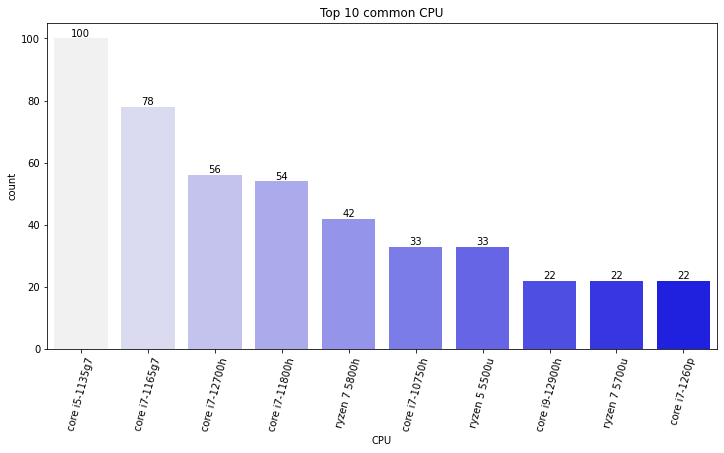

In [19]:
fig, ax  = plt.subplots(figsize=(12,6))
ax=sns.countplot(x = 'CPU', data = data,  order = data['CPU'].value_counts()[:10].index, palette = 'light:b')
ax.bar_label(ax.containers[0])
plt.title('Top 10 common CPU')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
plt.show()

intel chips are very common especially medium price chip core i5 or nearly high price chip like core i7

In [20]:
CPU = []
for cpu in data['CPU']:
    cpu = cpu.replace('-', ' - ')
    if len(cpu.split()) >= 2:
        name_cpu = cpu.split()[0:2]
        CPU.append(' '.join(name_cpu))
    else:
        CPU.append(cpu)
data['CPU'] = CPU

In [21]:
data.loc[data['CPU'] == '3020e', 'CPU'] = 'AMD 3020e'

In [22]:
data['RAM_DDR'] = data['RAM_DDR'].astype(str)

In [23]:
y = data['Price(USD)']
X = data.drop('Price(USD)', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)

In [24]:
X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

In [25]:
data_test = X_test.copy()
data_test['Price(USD)'] = y_test

In [26]:
data_val = X_val.copy()
data_val['Price(USD)'] = y_val

In [27]:
data_train = X_train.copy()
data_train['Price(USD)'] = y_train

In [28]:
data_train

,Laptop_name,Year,OS,CPU,CPU_Cores,CPU_Threads,CPU_Default_Clock,CPU_Boosted_Clock,CPU_Transistor_Size(nm),CPU_L3(MB),...,RAM(GB),RAM_bus,RAM_DDR,Storage(GB),Display_Inch,Display_Height(pixel),Display_Width(pixel),Weight(kg),Brand,Price(USD)
637,Lenovo Yoga Slim 7 ProX 14ARH7-82TL000BGE,2022,Windows,ryzen 9,8,16,3.3,4.9,6,16,...,32,0,5,1024,14.5,3072,1920,1.450,Lenovo,1945.0
1657,Gigabyte Aero 15 OLED XC,2021,Windows,core i7,8,16,2.2,5.0,14,16,...,32,0,4,1024,15.6,3840,2160,2.230,Gigabyte Aero,2720.0
1376,Asus TUF Gaming A15 FA506QR-AZ061T,2021,Windows,ryzen 7,8,16,3.2,4.4,7,16,...,16,0,4,1024,15.6,1920,1080,2.300,Asus,2011.0
733,LG Gram 14Z90Q,2022,Windows,core i5,12,16,1.7,4.4,10,12,...,16,0,4,512,14.0,1920,1200,0.980,LG,1156.0
608,Lenovo IdeaPad Flex 5i 14IAU7,2022,Windows,core i5,10,12,1.3,4.4,10,12,...,16,4266,4,512,14.0,1920,1200,1.613,Lenovo,700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Asus Vivobook Pro 16X M7600QC-L2002T,2022,Windows,ryzen 7,8,16,3.2,4.4,7,16,...,16,0,4,1024,16.0,3840,2160,1.950,Asus,1261.0
1724,"HP EliteBook x360 1040 G7, i7-10810U",2021,Windows,core i7,6,12,1.1,4.9,14,12,...,16,2933,4,512,14.0,1920,1080,1.361,HP,2500.0
1077,LG Gram 16 2-in-1 16T90P,2021,Windows,core i7,4,8,2.8,4.7,10,12,...,16,0,4,512,16.0,2560,1600,1.454,LG,1600.0
33,Acer Swift X SFX14-51G-79RJ,2022,Windows,core i7,12,16,2.1,4.7,10,18,...,16,0,5,1024,14.0,2240,1400,1.400,Acer,1366.0


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price distribution')

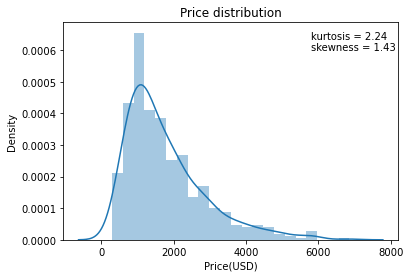

In [29]:
sns.distplot(y_train)
plt.annotate('kurtosis = {:.2f}\nskewness = {:.2f}'.format(kurtosis(y_train), skew(y_train)), xy=(0.74, 0.87), xycoords='axes fraction')
plt.title("Price distribution")

The distribution is positive skew and lefto kurtosis -> use log transform to make the distribution more normal

In [30]:
y_train = np.log(y_train)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log transformed price distribution')

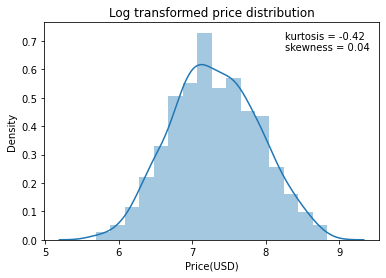

In [31]:
sns.distplot(y_train)
plt.annotate('kurtosis = {:.2f}\nskewness = {:.2f}'.format(kurtosis(y_train), skew(y_train)), xy=(0.72, 0.87), xycoords='axes fraction')
plt.title("Log transformed price distribution")

Text(0.5, 1.0, 'Average price of laptops by brand')

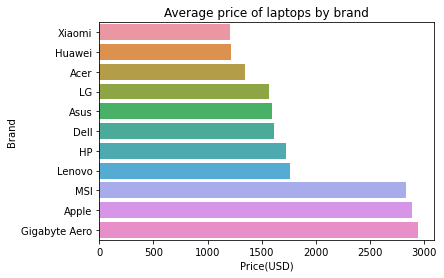

In [32]:
sns.barplot(y = data_train.groupby('Brand')['Price(USD)'].mean().sort_values().index, x = data_train.groupby('Brand')['Price(USD)'].mean().sort_values(), orient = 'h')
plt.title("Average price of laptops by brand")

high price segment: apple, msi, gigabyte aero<br>medium price segment: dell, lg, asus, lenovo, hp<br>low price segment: xiaomi, acer, huawei

<AxesSubplot:xlabel='Price(USD)', ylabel='CPU'>

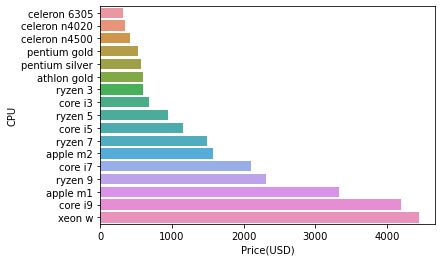

In [33]:
sns.barplot(y =  data_train.groupby('CPU')['Price(USD)'].mean().sort_values().index, x = data_train.groupby('CPU')['Price(USD)'].mean().sort_values(), orient = 'h')

for intel chip laptop: laptop with more modern chip tends to have more expensive price

In [34]:
pearson_correlation = data_train.corr()

<AxesSubplot:>

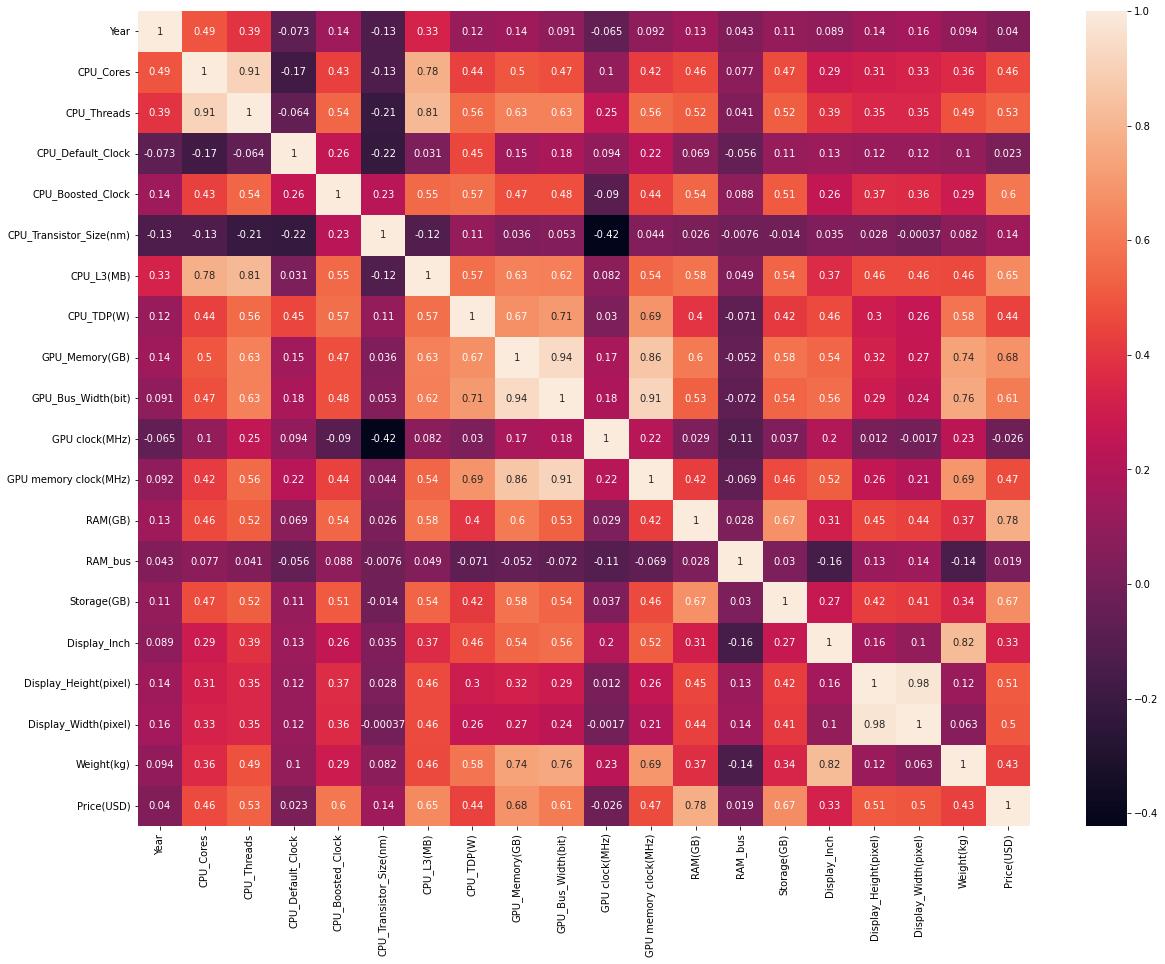

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(pearson_correlation, xticklabels = pearson_correlation.columns, yticklabels = pearson_correlation.columns, annot = True)

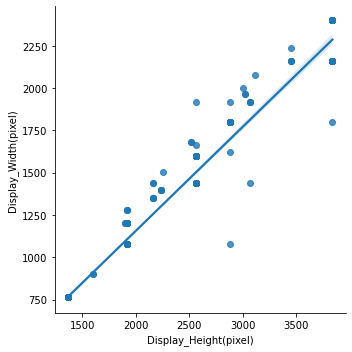

In [36]:
sns.lmplot(x = 'Display_Height(pixel)', y = 'Display_Width(pixel)', data = data_train)

longer height implies longer width

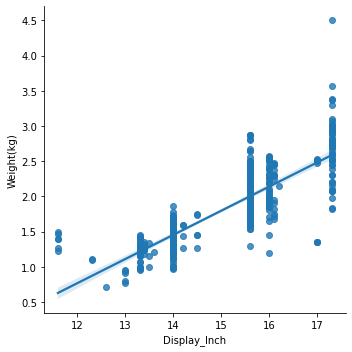

In [37]:
sns.lmplot(x = 'Display_Inch', y = 'Weight(kg)', data = data_train)

Laptop which has large display tends to be heavier

In [38]:
data_train.drop(axis = 0,labels = data_train[(data_train['Weight(kg)'] > 4) & (data_train['Display_Inch'] > 17)].index, inplace = True)

<AxesSubplot:xlabel='RAM(GB)', ylabel='Price(USD)'>

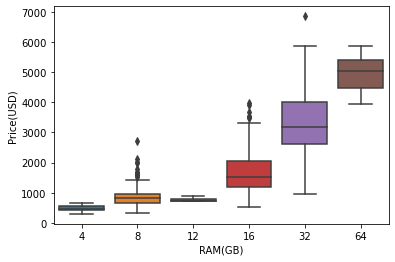

In [39]:
sns.boxplot(x = 'RAM(GB)', y = 'Price(USD)', data = data_train)

<AxesSubplot:xlabel='GPU_Memory(GB)', ylabel='Price(USD)'>

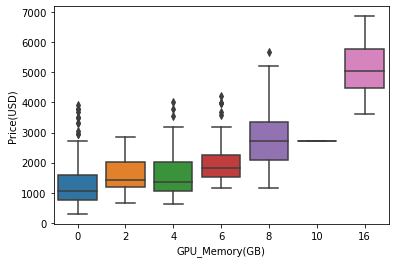

In [40]:
sns.boxplot(x = 'GPU_Memory(GB)', y = 'Price(USD)', data = data_train)

drop low or no pearson correlation attributes with price(abs <= 0.2): Year, CPU_Default_Clock, CPU_Transistor_Size(nm), GPU clock(MHz), RAM_bus<br>
pairs of attributes that have high correlations(>= 0.9): CPU_Threads and CPU_Cores, GPU_Memory(GB) and GPU_Bus_Width(bit), Display_Width(pixel) and Display_Height(pixel) -> drop CPU_Cores, GPU_Bus_Width(bit), Display_Width(pixel)<br>
Noticable point: CPU_Boosted_Clock has much higher correlation with price in comparison with CPU_Default_Clock.User tends to trade electricity for increasing in chip performance<br> 

In [41]:
data_train.drop(['Year', 'CPU_Default_Clock', 'CPU_Transistor_Size(nm)', 'GPU clock(MHz)',
           'RAM_bus', 'CPU_Cores', 'GPU_Bus_Width(bit)', 'Display_Width(pixel)'],
          axis = 1, inplace = True)

In [42]:
data_train.to_csv('train_val_test/train.csv')
data_test.to_csv('train_val_test/test.csv')
data_val.to_csv('train_val_test/val.csv')